In [35]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("../Data/Cleaned_Data.csv")
df

,Balance,Balance_Frequency,Purchases,One_Off_Purchases,Installments_Purchases,Cash_Advance,Purchases_Frequency,One_Off_Purchases_Frequency,Purchases_Installments_Frequency,Cash_Advance_Frequency,Cash_Advance_Trx,Purchases_Trx,Credit_Limit,Payments,Minimum_Payments,Prc_Full_Payment,Tenure
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8871,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,0.000000,0.000000,6
8872,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8873,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8874,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [36]:
from sklearn.cluster import KMeans

kmeans_params = {"init": "random", "n_init": 10, "max_iter": 350, "random_state": 42}

inertia_values = [
    KMeans(n_clusters=k, **kmeans_params).fit(df).inertia_
    for k in range(1, 11)
]

In [37]:
from kneed import KneeLocator
k1 = KneeLocator(range(1, 11), inertia_values, curve="convex", direction="decreasing")
elbow_point = k1.elbow
print(f"The optimal number of clusters is: {elbow_point}")

The optimal number of clusters is: 3


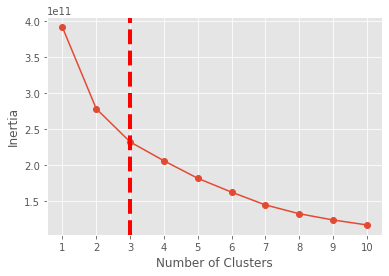

In [38]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.plot (range (1,11), inertia_values , marker = 'o')
plt.xticks (range (1, 11))
plt.xlabel ("Number of Clusters")
plt.ylabel ("Inertia")
plt.axvline (x = elbow_point, color = "red", label = "axvline - full height",linewidth = 4, linestyle ="--")
plt.show ()

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans (n_clusters = 4)
kmeans = kmeans.fit (df)

centroids = kmeans.cluster_centers_
print (centroids)

clusters = kmeans.labels_
print (clusters)

[[1.65871585e+03 9.06030503e-01 1.64570035e+03 1.04600215e+03
  6.00098863e+02 7.13642952e+02 6.03436441e-01 3.56954790e-01
  4.18494777e-01 1.04025838e-01 2.33676534e+00 2.26392106e+01
  7.67910183e+03 2.12736832e+03 6.03875221e+02 2.07519116e-01
  1.17889318e+01]
 [6.19810949e+03 9.75482995e-01 1.10106086e+03 5.98320340e+02
  5.02828039e+02 4.62860323e+03 3.92842511e-01 1.88382251e-01
  2.97372289e-01 3.89185461e-01 1.17294118e+01 1.71450980e+01
  9.77928699e+03 3.95445537e+03 3.37625439e+03 2.43577046e-02
  1.16235294e+01]
 [8.51109762e+02 8.61114165e-01 5.15961494e+02 2.51693775e+02
  2.64561613e+02 5.23115155e+02 4.51001496e-01 1.33858376e-01
  3.44854726e-01 1.13631256e-01 2.40805511e+00 9.66525349e+00
  2.31397937e+03 9.23690699e+02 5.63652496e+02 1.47024427e-01
  1.13875640e+01]
 [4.83640583e+03 9.12215790e-01 1.13918362e+04 8.16094521e+03
  3.23107588e+03 4.97958522e+03 7.68703832e-01 6.29044370e-01
  6.16548454e-01 2.09665664e-01 8.52941176e+00 8.90252101e+01
  1.27189076e+04

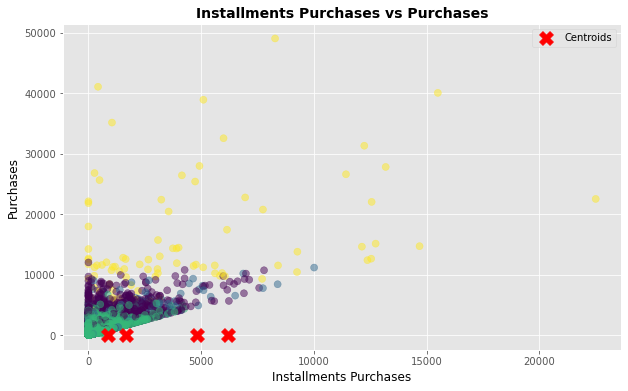

In [40]:
df_with_clusters = df.copy()
df_with_clusters['Clusters'] = kmeans.labels_
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(df["Installments_Purchases"], df["Purchases"], 
                     c=kmeans.labels_.astype(float), s=50, alpha=0.5, cmap='viridis')
ax.scatter(centroids[:, 0], centroids[:, 1], c="red", s=200, marker='X', label='Centroids')

ax.set_title("Installments Purchases vs Purchases", weight="bold", color="black", fontsize=14)
ax.set_xlabel("Installments Purchases", color="black", fontsize=12)
ax.set_ylabel("Purchases", color="black", fontsize=12)

ax.legend()
ax.grid(True)

plt.show()

<AxesSubplot:xlabel='Clusters', ylabel='count'>

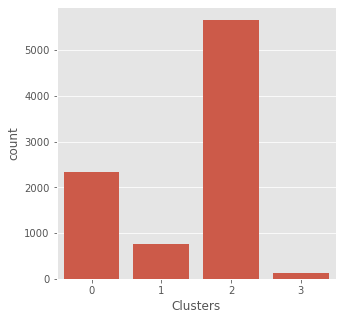

In [41]:
plt.figure (figsize = (5 , 5))
sns.countplot (x=df_with_clusters["Clusters"])

Text(0, 0.5, 'Payments')

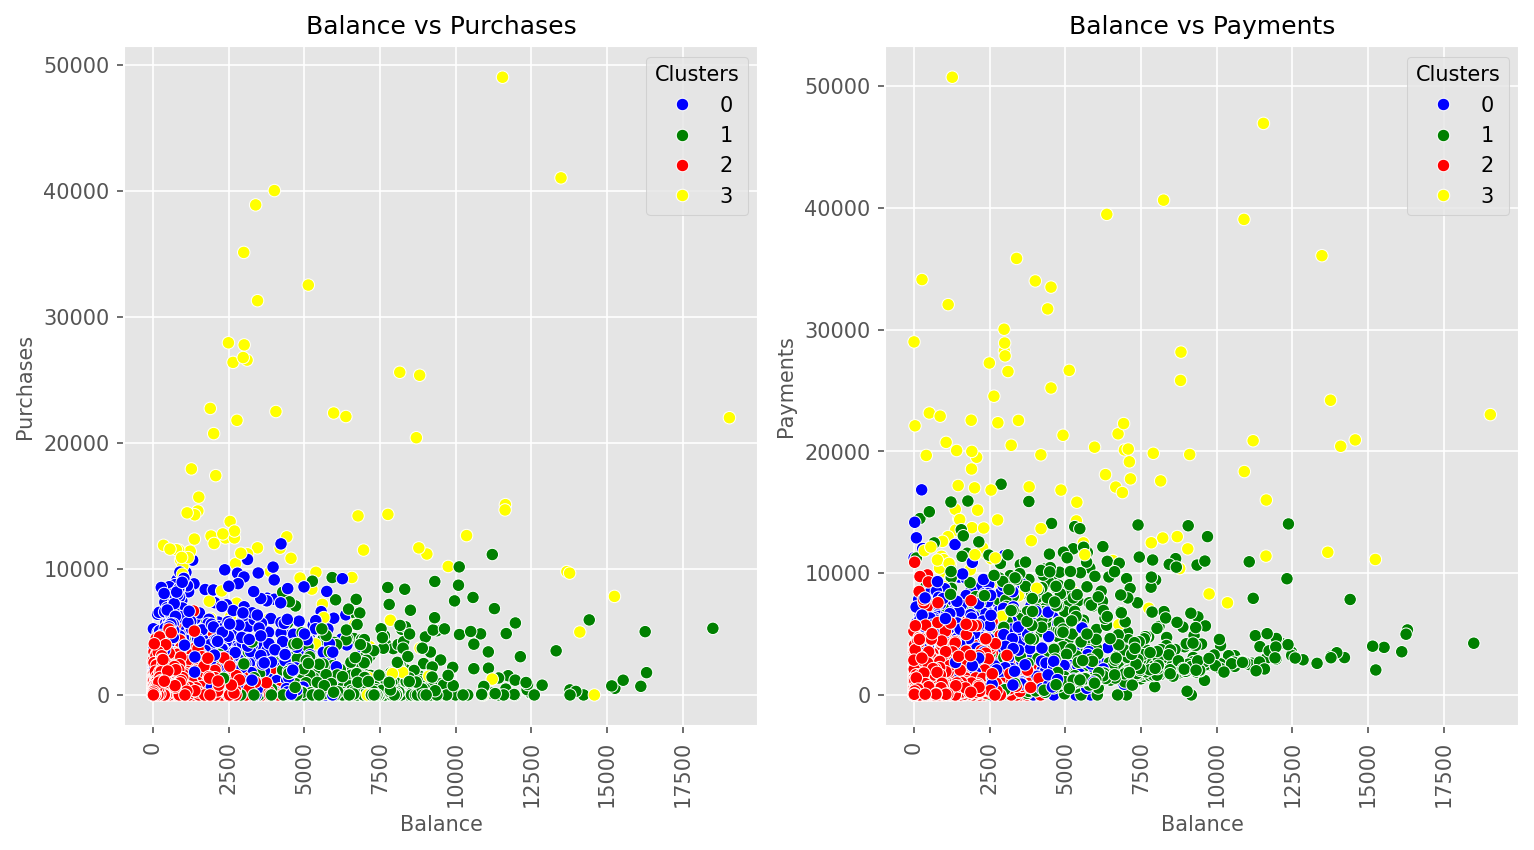

In [42]:
fig = plt.figure (figsize = (12 , 6) , dpi = 150)

plt.subplot (1 , 2 , 1)
sns.scatterplot (x='Balance' , y='Purchases' , hue = 'Clusters' , palette=['blue','green','red','yellow'], data=df_with_clusters)
plt.title('Balance vs Purchases' , fontsize = 12)
plt.xticks (rotation = 90 , fontsize=10)
plt.yticks (fontsize=10)
plt.xlabel ('Balance' , fontsize=10)
plt.ylabel ('Purchases' , fontsize=10)


plt.subplot (1 , 2 , 2)
sns.scatterplot (x='Balance' , y='Payments' , hue = 'Clusters' , palette=['blue','green','red', 'yellow'], data=df_with_clusters)
plt.title('Balance vs Payments' , fontsize = 12)
plt.xticks (rotation = 90 , fontsize=10)
plt.yticks (fontsize=10)
plt.xlabel ('Balance' , fontsize=10)
plt.ylabel ('Payments' , fontsize=10)


Text(0, 0.5, 'Purchases')

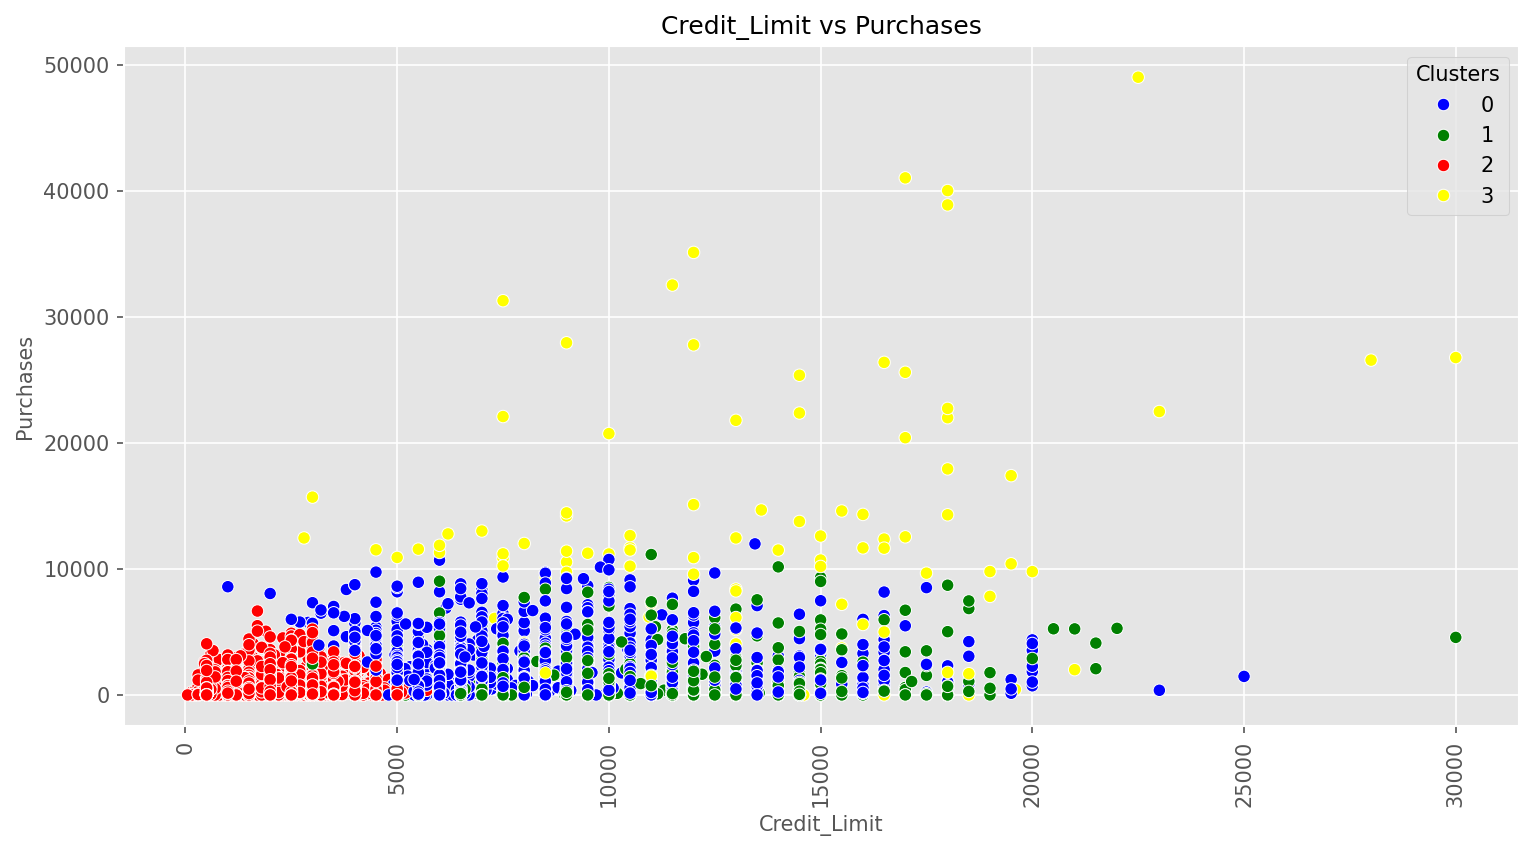

In [43]:
fig = plt.figure (figsize = (12 , 6) , dpi = 150)

sns.scatterplot (x='Credit_Limit' , y='Purchases' , hue = 'Clusters' , palette=['blue','green','red','yellow'], data=df_with_clusters)
plt.title('Credit_Limit vs Purchases' , fontsize = 12)
plt.xticks (rotation = 90 , fontsize=10)
plt.yticks (fontsize=10)
plt.xlabel ('Credit_Limit' , fontsize=10)
plt.ylabel ('Purchases' , fontsize=10)

In [44]:
df_with_clusters.to_csv('../Data/Kmeans_Clusters.csv')